# **0. Hackathon and Project Overview** 

## **Hackathon Performance and Result**

[MIT ADSP (Applied Data Science Program)](https://www.mygreatlearning.com/mit-data-science-program) Hackathon hosted by [Great Learning](https://www.mygreatlearning.com/) was held on 4/29-5/1, 2022. Our team succesfully won the [Top 7th Hacker](https://www.linkedin.com/in/alvinkuo/overlay/education/775819762/multiple-media-viewer/?treasuryMediaId=1635492781823) with this amazing project in a fabulous team-work.

### **Result #7 with 95.62% Accuracy** 
In 72 hours, our team Bella Mindz got 7th place among global 170 teams and reached 95.62384% which means we predicted 34,044 correctly from 35,602 in test dataset. We're only 0.26684% from the #1 winner, which is 95-prediction small gap, a very competitive among top 10 landscape


### **Project Overview**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. 

The on-time performance of the trains along with passenger information is saved in one file.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled in the 2nd file.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled in the 3rd file. 

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. We are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

# **1. Understand the Problem Statement and Import the Packages**

## **A. Problem Statement**

### **Goal**
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

### **Dataset** 
The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

### **Target Variable**
Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine learning model. The training set has labels for the target column

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

### **Data Dictionary**
All the data is self-explanatory. The survey levels are explained in the Data Dictionary.

### **Submission File Format**
You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)


# **B. Import the Packages**

### **Prep the Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# **2. Import dataset**

## **Moun the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Get Current Work Directory**

In [ ]:
# cwd = current work directory
import os
os.getcwd()

'/content'

### **Prep the Path** 

In [ ]:
# Google Colab and multiple member file structures
# Easy to comment out and choose the best path fit

# /content

survey_train_df = pd.read_csv("/content/Surveydata_train.csv")
survey_test_df = pd.read_csv("/content/Surveydata_test.csv")
travel_train_df = pd.read_csv("/content/Traveldata_train.csv") 
travel_test_df = pd.read_csv("/content/Traveldata_test.csv")

# /

# survey_train_df = pd.read_csv("/Surveydata_train.csv") 
# survey_test_df = pd.read_csv("/Surveydata_test.csv")
# travel_train_df = pd.read_csv("/Traveldata_train.csv") 
# travel_test_df = pd.read_csv("/Traveldata_test.csv")

# /content/drive/MyDrive/GL_Hackathon

# survey_train_df = pd.read_csv("/content/drive/MyDrive/GL_Hackathon/Surveydata_train.csv")
# survey_test_df = pd.read_csv("/content/drive/MyDrive/GL_Hackathon/Surveydata_test.csv")
# travel_train_df = pd.read_csv("/content/drive/MyDrive/GL_Hackathon/Traveldata_train.csv")
# travel_test_df = pd.read_csv("/content/drive/MyDrive/GL_Hackathon/Traveldata_test.csv")

## **3. Perform EDA - Exploratory Data Analysis**

Understanding the Datasets. Explore Train and Test Data and get to know what each Column / Feature denotes. Check for Imbalance of Target Column in Datasets

## **Explore Train and Test Data**

### **Check Head & Tail**

In [ ]:
# Overview with head and tail by append and transpose

# Surveydata_train
print('Surveydata_train')
display(survey_train_df.head(3).append(survey_train_df.tail(3)).T)
print('_'*120)
# Surveydata_test
print('Surveydata_test')
display(survey_test_df.head(3).append(survey_test_df.tail(3)).T)
print('_'*120)
# Traveldata_train
print('Traveldata_train')
display(travel_train_df.head(3).append(travel_train_df.tail(3)).T)
print('_'*120)
# Traveldata_test
print('Traveldata_test')
display(travel_test_df.head(3).append(travel_test_df.tail(3)).T)

Surveydata_train


,0,1,2,94376,94377,94378
ID,98800001,98800002,98800003,98894377,98894378,98894379
Overall_Experience,0,0,1,1,0,0
Seat_Comfort,Needs Improvement,Poor,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable
Seat_Class,Green Car,Ordinary,Green Car,Green Car,Ordinary,Ordinary
Arrival_Time_Convenient,Excellent,Excellent,Needs Improvement,Needs Improvement,NaN,Poor
Catering,Excellent,Poor,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable
Platform_Location,Very Convenient,Needs Improvement,Needs Improvement,Needs Improvement,Convenient,Manageable
Onboard_Wifi_Service,Good,Good,Needs Improvement,Good,Good,Acceptable
Onboard_Entertainment,Needs Improvement,Poor,Good,Excellent,Needs Improvement,Acceptable
Online_Support,Acceptable,Good,Excellent,Good,Good,Acceptable


________________________________________________________________________________________________________________________
Surveydata_test


,0,1,2,35599,35600,35601
ID,99900001,99900002,99900003,99935600,99935601,99935602
Seat_Comfort,Acceptable,Extremely Poor,Excellent,Good,Excellent,Good
Seat_Class,Green Car,Ordinary,Ordinary,Green Car,Ordinary,Ordinary
Arrival_Time_Convenient,Acceptable,Good,Excellent,Extremely Poor,Excellent,Acceptable
Catering,Acceptable,Poor,Excellent,Good,Excellent,Good
Platform_Location,Manageable,Manageable,Very Convenient,Needs Improvement,Inconvenient,Manageable
Onboard_Wifi_Service,Needs Improvement,Acceptable,Excellent,Needs Improvement,Acceptable,Poor
Onboard_Entertainment,Excellent,Poor,Excellent,Good,Excellent,Good
Online_Support,Good,Acceptable,Excellent,Poor,Good,Poor
Ease_of_Online_Booking,Excellent,Acceptable,Needs Improvement,Needs Improvement,Excellent,Poor


________________________________________________________________________________________________________________________
Traveldata_train


,0,1,2,94376,94377,94378
ID,98800001,98800002,98800003,98894377,98894378,98894379
Gender,Female,Male,Female,Male,Male,Male
Customer_Type,Loyal Customer,Loyal Customer,Loyal Customer,NaN,Loyal Customer,Loyal Customer
Age,52.0,48.0,43.0,63.0,16.0,54.0
Type_Travel,NaN,Personal Travel,Business Travel,Business Travel,Personal Travel,NaN
Travel_Class,Business,Eco,Business,Business,Eco,Eco
Travel_Distance,272,2200,1061,2794,2744,2107
Departure_Delay_in_Mins,0.0,9.0,77.0,0.0,0.0,28.0
Arrival_Delay_in_Mins,5.0,0.0,119.0,0.0,0.0,28.0


________________________________________________________________________________________________________________________
Traveldata_test


,0,1,2,35599,35600,35601
ID,99900001,99900002,99900003,99935600,99935601,99935602
Gender,Female,Female,Male,Male,Female,Male
Customer_Type,NaN,Disloyal Customer,Loyal Customer,Disloyal Customer,Loyal Customer,NaN
Age,36.0,21.0,60.0,22.0,67.0,20.0
Type_Travel,Business Travel,Business Travel,Business Travel,Business Travel,Personal Travel,Personal Travel
Travel_Class,Business,Business,Business,Eco,Eco,Eco
Travel_Distance,532,1425,2832,1180,420,1680
Departure_Delay_in_Mins,0.0,9.0,0.0,0.0,23.0,0.0
Arrival_Delay_in_Mins,0.0,28.0,0.0,0.0,16.0,0.0


#### **Observations & Actions**
* **1. ID** - ID would be the column to merge:
 * **1) merged_train datasets** -  Surveydata_train and Traveldata_train would be merged a new dataset
 * **2) merged_set datasets** -  Surveydata_test and Traveldata_test would be merged a new dataset
* **2. Dummy** - Expected to be implmented later. Rating could be implemented, too.

## **Check Info**

In [ ]:
survey_train_df.info()
print("-"*50)
survey_test_df.info()
print("-"*50)
travel_train_df.info()
print("-"*50)
travel_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

#### **Observations & Actions**
* **1. Missing dadta** - Full of missing data everywhere. It would be a key challenge to fill in missing data skillfully
* **2. Object type** - Would be transforred to float, int or unit-8 later completely
* **3. 94,397 and 35,602** - Our final shape for the training and test set

## **Dive into 4 Datasets Seperatly**
### **Survey Train Dataset**

In [ ]:
survey_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

#### **Group the Numerical Rating into Scale**

In [ ]:
# Make a list of all categorical variables
s_cat_col = list(survey_train_df.select_dtypes("object").columns)
s_cat_col = list(survey_test_df.select_dtypes("object").columns)
print(s_cat_col)

['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']


In [ ]:
# Remove Seat_Class and Platform_Location which can't be with rating scale

s_cat_col.remove('Seat_Class')
s_cat_col.remove('Platform_Location')
print(s_cat_col)

['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']


In [ ]:
# Replace rating with rating/number to visualize easier and potential numerization/normalization
# Give Platform_Location another rating scale for the different naming following dictionary offerred
# GL instruction: (Platform_Location) Very Inconvenient < Inconvenient < Needs Improvement < Manageable < Convenient < Very Convenient

for col in s_cat_col:
  survey_train_df[col].replace(['Excellent', 
                                'Good', 
                                'Acceptable', 
                                'Needs Improvement', 
                                'Poor', 
                                'Extremely Poor'], 
                               [5.0, 4.0, 3.0, 2.0, 1.0, 0.0], inplace = True)
  survey_test_df[col].replace(['Excellent', 
                               'Good', 
                               'Acceptable', 
                               'Needs Improvement', 
                               'Poor', 
                               'Extremely Poor'], 
                              [5.0, 4.0, 3.0, 2.0, 1.0, 0], inplace = True)
  
# Platform_Location rating

survey_train_df['Platform_Location'].replace(['Very Convenient', 
                                              'Convenient', 
                                              'Manageable', 
                                              'Needs Improvement', 
                                              'Inconvenient', 
                                              'Very Inconvenient'], 
                                             [5.0, 4.0, 3.0, 2.0, 1.0, 0], inplace = True)
survey_test_df['Platform_Location'].replace(['Very Convenient', 
                                             'Convenient',
                                             'Manageable',
                                             'Needs Improvement', 
                                             'Inconvenient', 
                                             'Very Inconvenient'], 
                                            [5.0, 4.0, 3.0, 2.0, 1.0, 0], inplace = True)


#### **Review Dataframe after Ratings**

In [ ]:
display(survey_train_df.head(5).append(survey_train_df.tail(3)).T)

,0,1,2,3,4,94376,94377,94378
ID,98800001,98800002,98800003,98800004,98800005,98894377,98894378,98894379
Overall_Experience,0,0,1,0,1,1,0,0
Seat_Comfort,2.0,1.0,2.0,3.0,3.0,2.0,2.0,3.0
Seat_Class,Green Car,Ordinary,Green Car,Ordinary,Ordinary,Green Car,Ordinary,Ordinary
Arrival_Time_Convenient,5.0,5.0,2.0,2.0,3.0,2.0,NaN,1.0
Catering,5.0,1.0,2.0,NaN,3.0,2.0,2.0,3.0
Platform_Location,5.0,2.0,2.0,2.0,3.0,2.0,4.0,3.0
Onboard_Wifi_Service,4.0,4.0,2.0,3.0,2.0,4.0,4.0,3.0
Onboard_Entertainment,2.0,1.0,4.0,2.0,4.0,5.0,2.0,3.0
Online_Support,3.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0


#### **Visualize in Histogram and Box Plot**

Seat_Comfort
Skew : -0.09


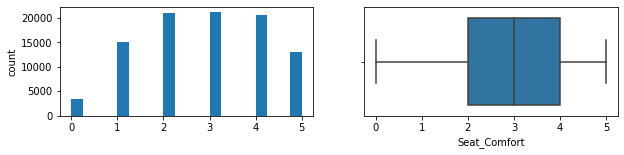

Arrival_Time_Convenient
Skew : -0.25


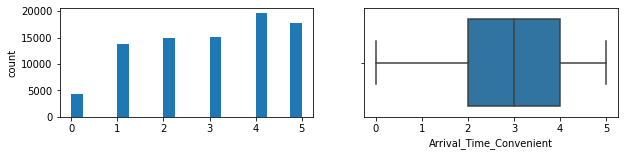

Catering
Skew : -0.12


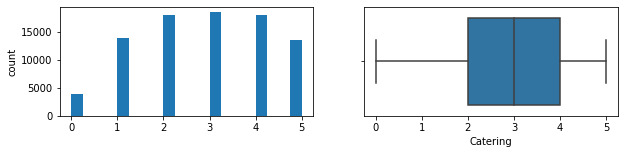

Onboard_Wifi_Service
Skew : -0.19


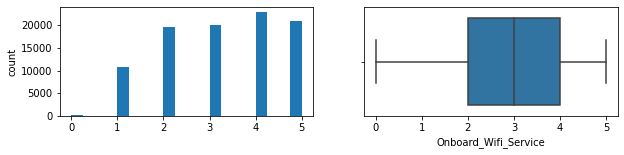

Onboard_Entertainment
Skew : -0.6


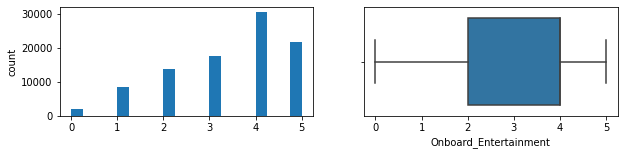

Online_Support
Skew : -0.57


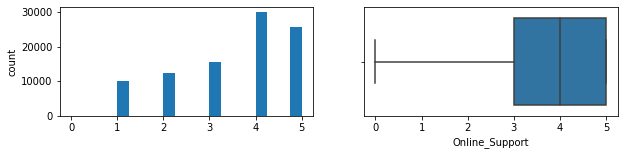

Ease_of_Online_Booking
Skew : -0.49


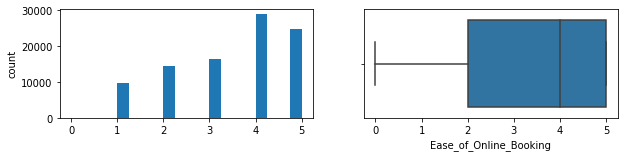

Onboard_Service
Skew : -0.51


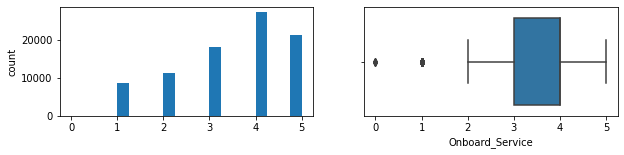

Legroom
Skew : -0.5


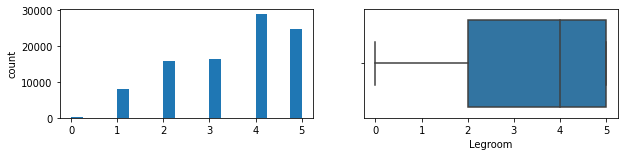

Baggage_Handling
Skew : -0.74


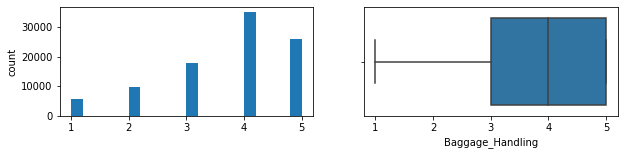

CheckIn_Service
Skew : -0.39


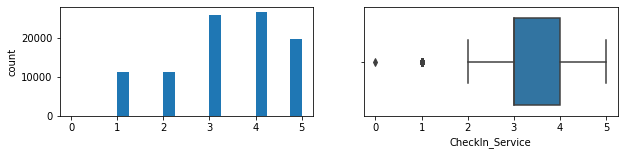

Cleanliness
Skew : -0.75


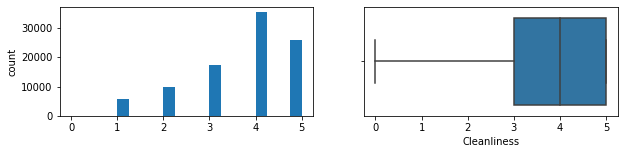

Online_Boarding
Skew : -0.37


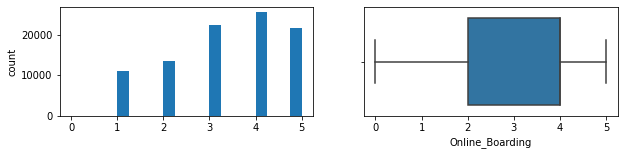

In [ ]:
for col in s_cat_col:
    print(col)
    print('Skew :',round(survey_train_df[col].skew(),2))
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    survey_train_df[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x = survey_train_df[col])
    plt.show()

#### **Observations & Actions**
* **1. Skewness** - Cleanliness (-0.75) and Bagg Handling (-0.74) have a very different skewnewss in comparison to Seat_Comfort (-0.09), Catering (-0.12) and Onboard_Wifi_Service (-0.19). 
* **2. Missing data** - We may fill in missing data not with the mode (3) or median (mostly 3) but very likely different mean (3.0, 3.5, 3.9...) to make it more higher chance to fit in different data's nature

## **Balance of Target Column**

In [ ]:
survey_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Seat_Comfort,94318.0,2.839182e+00,1.392526,0.0,2.0,3.0,4.0,5.0
Arrival_Time_Convenient,85449.0,2.994991e+00,1.526280,0.0,2.0,3.0,4.0,5.0
Catering,85638.0,2.853511e+00,1.443945,0.0,2.0,3.0,4.0,5.0
Platform_Location,94349.0,2.990864e+00,1.308233,0.0,2.0,3.0,4.0,5.0
Onboard_Wifi_Service,94349.0,3.248227e+00,1.319520,0.0,2.0,3.0,4.0,5.0
Onboard_Entertainment,94361.0,3.382510e+00,1.346190,0.0,2.0,4.0,4.0,5.0
Online_Support,94288.0,3.519250e+00,1.308174,0.0,3.0,4.0,5.0,5.0
Ease_of_Online_Booking,94306.0,3.470108e+00,1.305546,0.0,2.0,4.0,5.0,5.0


#### **Observations & Actions**
* **1. Balance Data** - Overall_Excellence 0.54 indicates 54% is "1" and 46% is "0". It could be a balanced data without specific further adjustment 
* **2. The Value to fill in missing data** - We clearly have a very wide range mean from Seat_Comfort (2.84) to Cleanliness (3.70). It further strenghten our confidence to use mean instead of mode and median

In [ ]:
survey_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  float64
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  float64
 5   Catering                 85638 non-null  float64
 6   Platform_Location        94349 non-null  float64
 7   Onboard_Wifi_Service     94349 non-null  float64
 8   Onboard_Entertainment    94361 non-null  float64
 9   Online_Support           94288 non-null  float64
 10  Ease_of_Online_Booking   94306 non-null  float64
 11  Onboard_Service          86778 non-null  float64
 12  Legroom                  94289 non-null  float64
 13  Baggage_Handling         94237 non-null  float64
 14  CheckIn_Service       

#### **Visualize by Correlation**

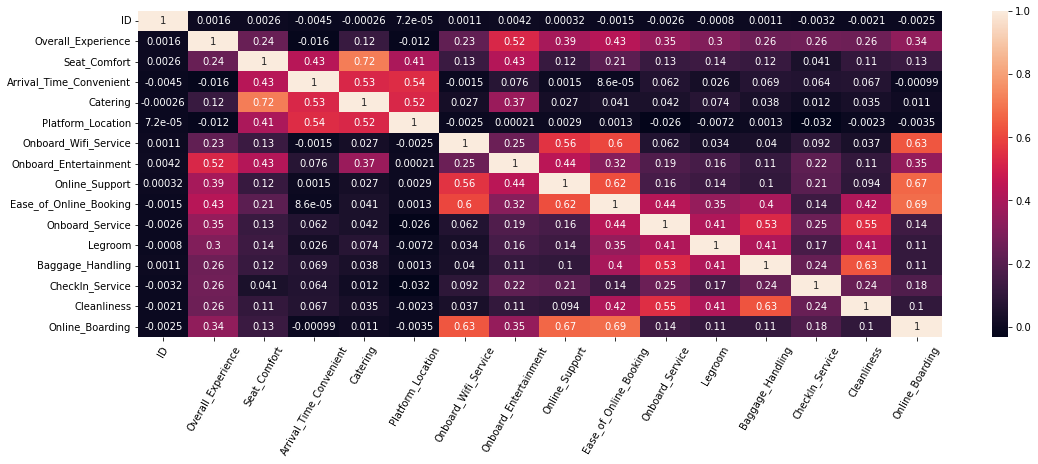

In [ ]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(survey_train_df.corr(), annot=True);
plt.xticks(rotation=60);

#### **Osbservations & Actions**
* **1. Seat_Comfort and Catering** - We may do A/B test if we drop these two features or not since the relationship between these two features with "Overall_Excellence" is almost zero 
* **2. Predict missing value of Onlin_Boarding** - we can use Online_Support, or Onboard_Entertainment to predict with high correlation around 0.69 and 0.67

## **4. Check for Duplicate Rows**

In [ ]:
print(survey_train_df.duplicated().sum())
print(survey_test_df.duplicated().sum())

0
0


## **5. Fill in Missing Data**

### **Fill in the missing data with the mean**

In [ ]:
# Fill in Catogorial Column
for col in s_cat_col:
  survey_train_df[col].fillna(survey_train_df[col].mean(), inplace=True)
  survey_test_df[col].fillna(survey_test_df[col].mean(), inplace=True)

# Fill in Platform_Location
survey_train_df['Platform_Location'].fillna(survey_train_df['Platform_Location'].mean(), inplace=True)
survey_test_df['Platform_Location'].fillna(survey_test_df['Platform_Location'].mean(), inplace=True)

In [ ]:
survey_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  float64
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  94379 non-null  float64
 5   Catering                 94379 non-null  float64
 6   Platform_Location        94379 non-null  float64
 7   Onboard_Wifi_Service     94379 non-null  float64
 8   Onboard_Entertainment    94379 non-null  float64
 9   Online_Support           94379 non-null  float64
 10  Ease_of_Online_Booking   94379 non-null  float64
 11  Onboard_Service          94379 non-null  float64
 12  Legroom                  94379 non-null  float64
 13  Baggage_Handling         94379 non-null  float64
 14  CheckIn_Service       

In [ ]:
survey_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Seat_Comfort,94379.0,2.839182e+00,1.392076,0.0,2.0,3.0,4.0,5.0
Arrival_Time_Convenient,94379.0,2.994991e+00,1.452279,0.0,2.0,3.0,4.0,5.0
Catering,94379.0,2.853511e+00,1.375454,0.0,2.0,3.0,4.0,5.0
Platform_Location,94379.0,2.990864e+00,1.308025,0.0,2.0,3.0,4.0,5.0
Onboard_Wifi_Service,94379.0,3.248227e+00,1.319311,0.0,2.0,3.0,4.0,5.0
Onboard_Entertainment,94379.0,3.382510e+00,1.346061,0.0,2.0,4.0,4.0,5.0
Online_Support,94379.0,3.519250e+00,1.307543,0.0,3.0,4.0,5.0,5.0
Ease_of_Online_Booking,94379.0,3.470108e+00,1.305041,0.0,2.0,4.0,5.0,5.0


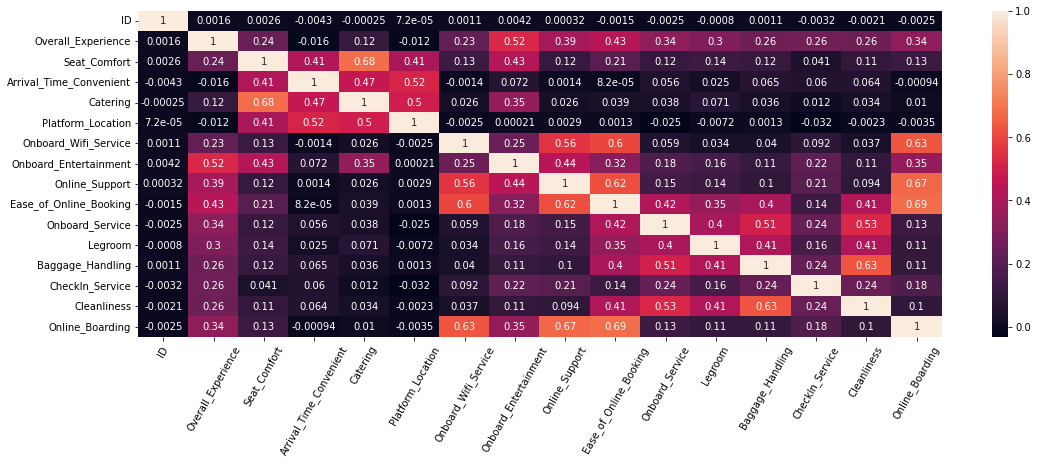

In [ ]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(survey_train_df.corr(), annot=True);
plt.xticks(rotation=60);

### **Osbservations & Actions**
* **1. Not too much change** - It's our final correlation chart

## **Bivariate Analysis**

Seat_Comfort


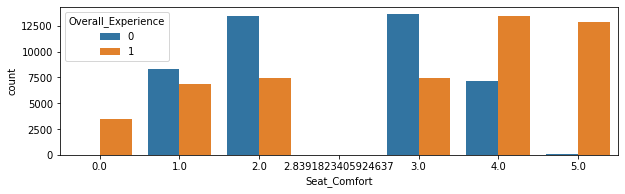

Arrival_Time_Convenient


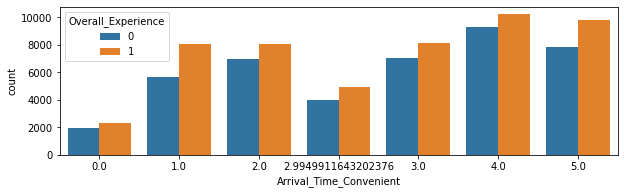

Catering


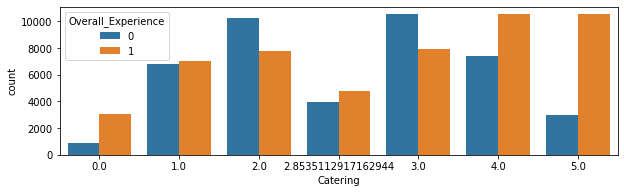

Onboard_Wifi_Service


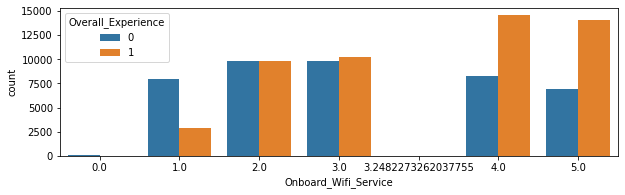

Onboard_Entertainment


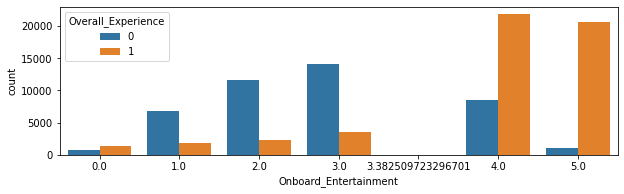

Online_Support


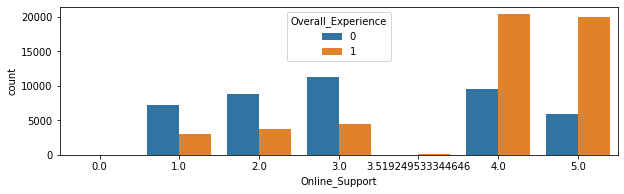

Ease_of_Online_Booking


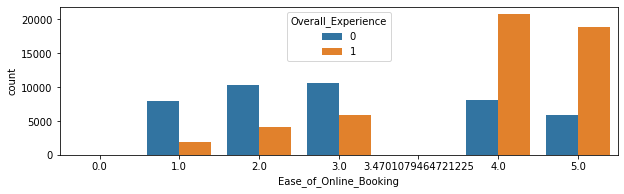

Onboard_Service


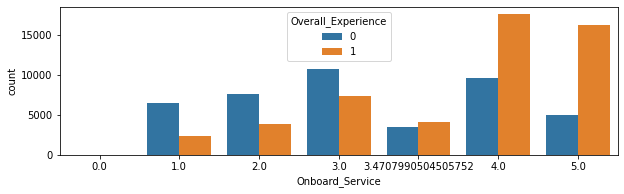

Legroom


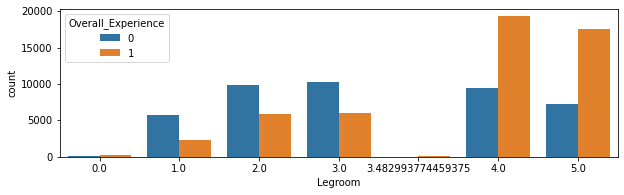

Baggage_Handling


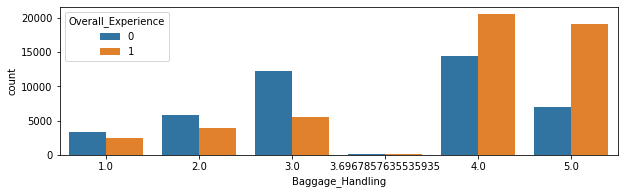

CheckIn_Service


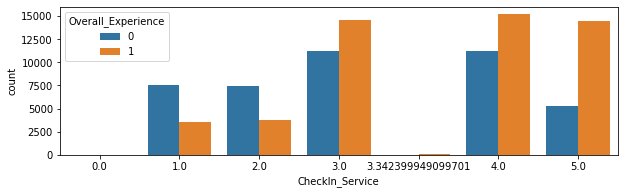

Cleanliness


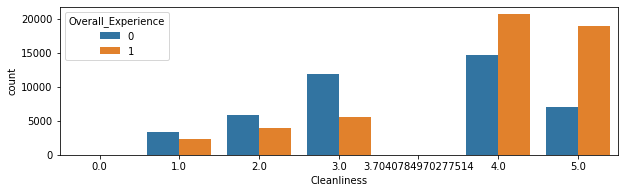

Online_Boarding


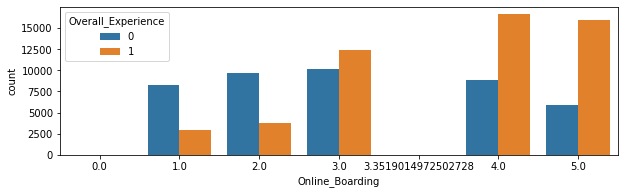

In [ ]:
for col in s_cat_col:
    print(col)
    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    sns.countplot( x = col, hue='Overall_Experience', data = survey_train_df)
    plt.show()

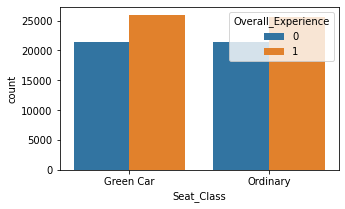

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot( x = 'Seat_Class', hue='Overall_Experience', data = survey_train_df)
plt.show()

#### **Osbservations & Actions**
* **Catering** - It could be the best feature to drop

## **Travel Train Data**

In [ ]:
travel_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


#### **Visualize in Histogram and Box Plot**

Age


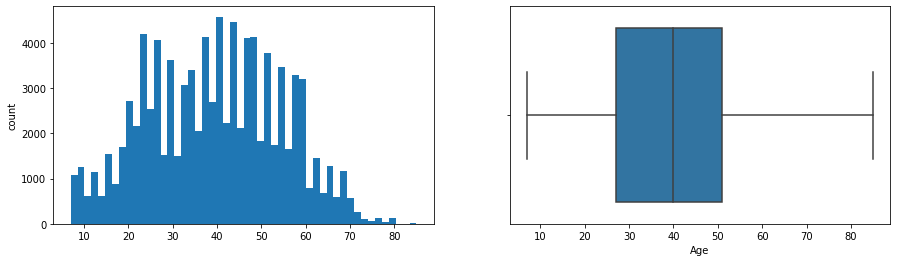

Travel_Distance


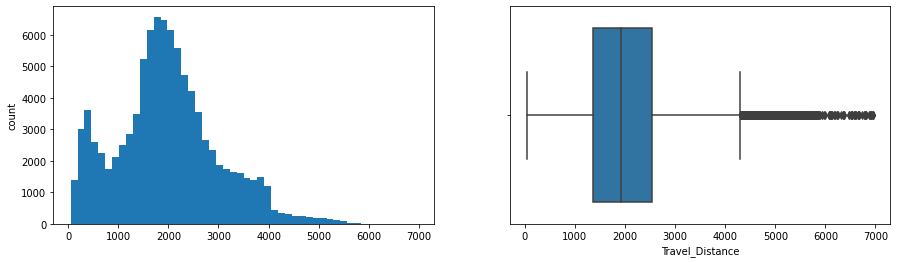

Departure_Delay_in_Mins


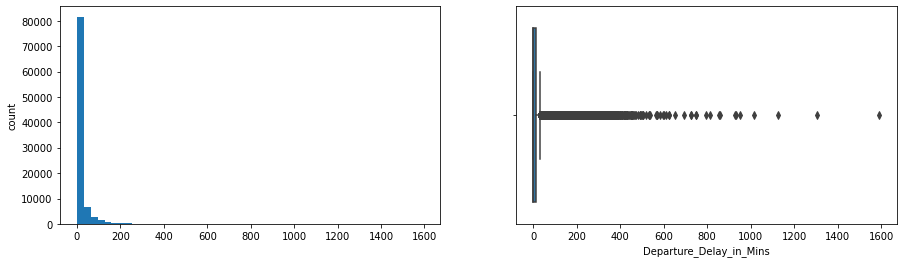

Arrival_Delay_in_Mins


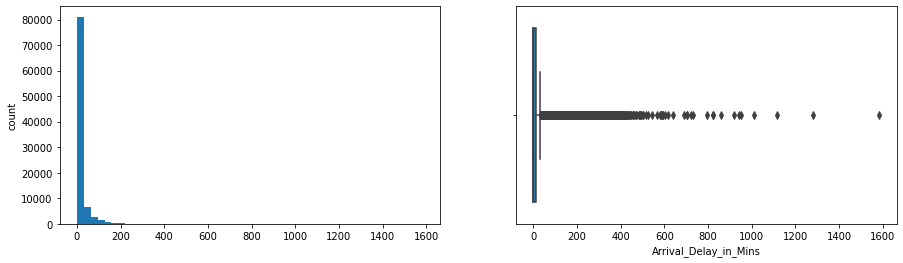

In [ ]:
for col in ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    travel_train_df[col].hist(bins=50, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=travel_train_df[col])
    plt.show()

#### **Osbservations & Actions**
* **1. Arrival_Delay_in_Mins and Departure_Delay_in_Mins** - Two data are very similar. Very likely the arrival and departure delay would be highly related. And the outlier needs to be carefully dealt with
* **2. Age and Travel_Distance** - We may need to categorize/give rating

#### **Osbservations & Actions**
* **1. Clear Influnece about Overall_Excellence** - All three factors: Age, Type_Travel and Travel_Class have clear influence toward predictdion

In [ ]:
travel_train_df.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


## **Merge Survey and Travel Datasets into Train and Test**

In [ ]:
merged_train_df = pd.merge(survey_train_df, travel_train_df, on= 'ID')
merged_test_df = pd.merge(survey_test_df, travel_test_df, on= 'ID')

In [ ]:
merged_train_df.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Overall_Experience,0,0,1,0,1
Seat_Comfort,2.0,1.0,2.0,3.0,3.0
Seat_Class,Green Car,Ordinary,Green Car,Ordinary,Ordinary
Arrival_Time_Convenient,5.0,5.0,2.0,2.0,3.0
Catering,5.0,1.0,2.0,2.853511,3.0
Platform_Location,5.0,2.0,2.0,2.0,3.0
Onboard_Wifi_Service,4.0,4.0,2.0,3.0,2.0
Onboard_Entertainment,2.0,1.0,4.0,2.0,4.0
Online_Support,3.0,4.0,5.0,3.0,5.0


In [ ]:
merged_test_df.head().T

,0,1,2,3,4
ID,99900001,99900002,99900003,99900004,99900005
Seat_Comfort,3.0,0.0,5.0,3.0,5.0
Seat_Class,Green Car,Ordinary,Ordinary,Green Car,Ordinary
Arrival_Time_Convenient,3.0,4.0,5.0,5.0,0.0
Catering,3.0,1.0,5.0,3.0,5.0
Platform_Location,3.0,3.0,5.0,5.0,2.0
Onboard_Wifi_Service,2.0,3.0,5.0,1.0,5.0
Onboard_Entertainment,5.0,1.0,5.0,3.0,5.0
Online_Support,4.0,3.0,5.0,5.0,5.0
Ease_of_Online_Booking,5.0,3.0,2.0,1.0,5.0


In [ ]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  float64
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  94379 non-null  float64
 5   Catering                 94379 non-null  float64
 6   Platform_Location        94379 non-null  float64
 7   Onboard_Wifi_Service     94379 non-null  float64
 8   Onboard_Entertainment    94379 non-null  float64
 9   Online_Support           94379 non-null  float64
 10  Ease_of_Online_Booking   94379 non-null  float64
 11  Onboard_Service          94379 non-null  float64
 12  Legroom                  94379 non-null  float64
 13  Baggage_Handling         94379 non-null  float64
 14  CheckIn_Service       

In [ ]:
merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35602 non-null  float64
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  35602 non-null  float64
 4   Catering                 35602 non-null  float64
 5   Platform_Location        35602 non-null  float64
 6   Onboard_Wifi_Service     35602 non-null  float64
 7   Onboard_Entertainment    35602 non-null  float64
 8   Online_Support           35602 non-null  float64
 9   Ease_of_Online_Booking   35602 non-null  float64
 10  Onboard_Service          35602 non-null  float64
 11  Legroom                  35602 non-null  float64
 12  Baggage_Handling         35602 non-null  float64
 13  CheckIn_Service          35602 non-null  float64
 14  Cleanliness           

#### **Osbservations & Actions**
* **1. Missing Data** - There are still 6 features in need to be filled in the missing data

### **Fill in Merged Dataset for Missing Data**

In [ ]:
print("Null count- MergeTraining: ", merged_train_df.isna().sum(),"\n\n")
print("Null count- MergeTest: ", merged_test_df.isna().sum(),"\n")

Null count- MergeTraining:  ID                            0
Overall_Experience            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location             0
Onboard_Wifi_Service          0
Onboard_Entertainment         0
Online_Support                0
Ease_of_Online_Booking        0
Onboard_Service               0
Legroom                       0
Baggage_Handling              0
CheckIn_Service               0
Cleanliness                   0
Online_Boarding               0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64 


Null count- MergeTest:  ID                            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Cate

#### **Visualize Bivariate Analysis in Count Plot**

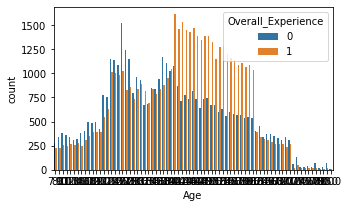

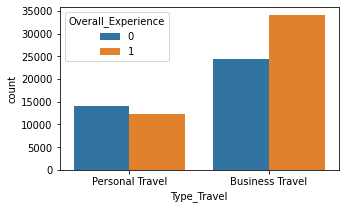

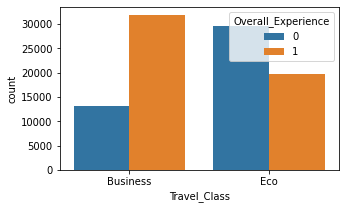

In [ ]:
t_col = ['Age', 'Type_Travel', 'Travel_Class']
for col in t_col:
  plt.figure(figsize=(5,3))
  sns.countplot(x = col, hue = 'Overall_Experience', data = merged_train_df)
  plt.show()

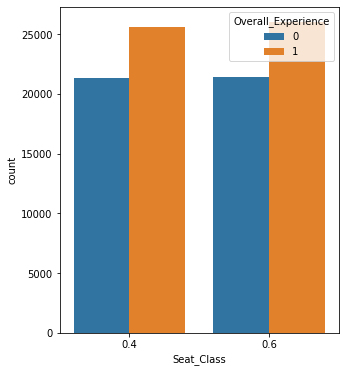

In [ ]:
merged_train_df['Seat_Class'].replace(['Green Car', 'Ordinary'], [0.6, 0.4], inplace = True)
merged_test_df['Seat_Class'].replace(['Green Car', 'Ordinary'], [0.6, 0.4], inplace = True)

t_col = ['Seat_Class']
for col in t_col:
  plt.figure(figsize=(5,6))
  sns.countplot(x = col, hue = 'Overall_Experience', data = merged_train_df)
  plt.show()

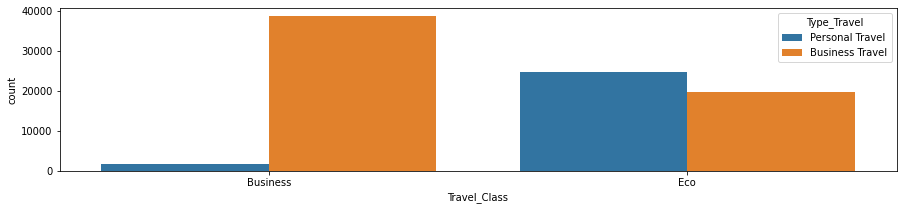

In [ ]:
t_col = ['Travel_Class']
for col in t_col:
  plt.figure(figsize=(15,3))
  sns.countplot(x = col, hue = 'Type_Travel', data = merged_train_df)
  plt.show()

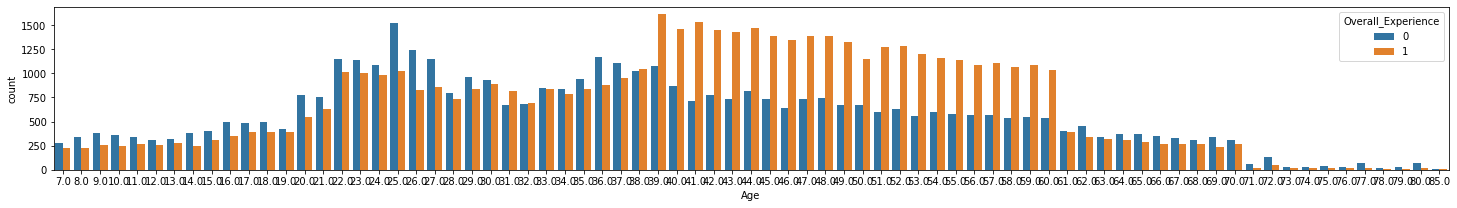

In [ ]:
t_col = ['Age']
for col in t_col:
  plt.figure(figsize=(25,3))
  sns.countplot(x = col, hue = 'Overall_Experience', data = merged_train_df)
  plt.show()

#### **Osbservations & Actions**
* **1. Age vs Overall_Excellence** - 40-60 years old generation has a very specific higher overall_excellence tendency in comparison to other generation
* **2. Type_Travel and Travel_Class** - A clear tendency to influence the overall_excellence

#### **Revisit Delay and Overall_Excellence**

In [ ]:
merged_train_df_a = merged_train_df[['Arrival_Delay_in_Mins', 'Overall_Experience']]
merged_train_df_a.sort_values(['Arrival_Delay_in_Mins'], ascending = False).iloc[:20,:] 

,Arrival_Delay_in_Mins,Overall_Experience
12755,1584.0,0
40837,1280.0,1
22845,1115.0,0
62544,1011.0,1
26855,952.0,0
44159,940.0,0
30723,920.0,1
55955,860.0,1
37662,823.0,0
27510,822.0,0


#### **Osbservations & Actions**
* **1. Delay does not directly lead to unsatisfactory effect** - We may assume delay bring the overall_excellence down as a key to prediction. But the overall_excellence of the top 20 delay passengers crashes this direction

#### **Fill in Delay of Arrival and Departure**

In [ ]:
# Calculating quantiles
Q1 =  merged_train_df['Departure_Delay_in_Mins'].quantile(0.25)
Q3 =  merged_test_df['Departure_Delay_in_Mins'].quantile(0.75)
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
merged_train_df.loc[merged_train_df['Departure_Delay_in_Mins'] >= 33, 'Departure_Delay_in_Mins'] = Upper_Whisker

# Calculating quantiles
Q1 =  merged_test_df['Departure_Delay_in_Mins'].quantile(0.25)
Q3 =  merged_test_df['Departure_Delay_in_Mins'].quantile(0.75)
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
merged_test_df.loc[merged_test_df['Departure_Delay_in_Mins'] >= 33, 'Departure_Delay_in_Mins'] = Upper_Whisker

merged_train_df['Departure_Delay_in_Mins'] = pd.cut(merged_train_df['Departure_Delay_in_Mins'], 5, labels = ['5', '4', '3', '2', '1'])
merged_test_df['Departure_Delay_in_Mins'] = pd.cut(merged_test_df['Departure_Delay_in_Mins'], 5, labels = ['5', '4', '3', '2', '1'])

merged_train_df['Departure_Delay_in_Mins'].unique()
merged_test_df['Departure_Delay_in_Mins'].unique()

['5', '4', '3', '1', '2', NaN]
Categories (5, object): ['5' < '4' < '3' < '2' < '1']

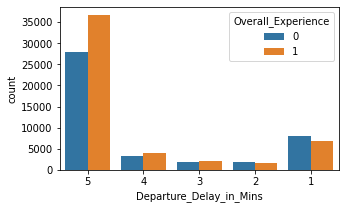

In [ ]:
t_col = ['Departure_Delay_in_Mins']
for col in t_col:
  plt.figure(figsize=(5,3))
  sns.countplot(x = col, hue = 'Overall_Experience', data = merged_train_df)
  plt.show()

In [ ]:
merged_train_df['Departure_Delay_in_Mins'].fillna('5', inplace=True)
merged_test_df['Departure_Delay_in_Mins'].fillna('5', inplace=True)

In [ ]:
merged_train_df['Arrival_Delay_in_Mins'].fillna(merged_train_df['Arrival_Delay_in_Mins'].mean(), inplace=True)
merged_test_df['Arrival_Delay_in_Mins'].fillna(merged_test_df['Arrival_Delay_in_Mins'].mean(), inplace=True)

#### **Fill in Travel_Distance**

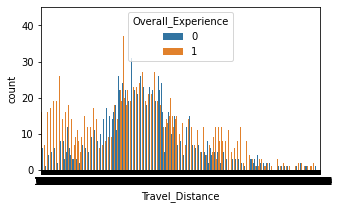

In [ ]:
t_col = ['Travel_Distance']
for col in t_col:
  plt.figure(figsize=(5,3))
  sns.countplot(x = col, hue = 'Overall_Experience', data = merged_train_df)
  plt.show()

In [ ]:

# Calculate quantiles
Q1 =  merged_train_df['Travel_Distance'].quantile(0.25)
Q3 =  merged_train_df['Travel_Distance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

merged_train_df.loc[merged_train_df['Travel_Distance'] >= 4037, 'Travel_Distance'] = Upper_Whisker

# Test
# Calculating quantiles
Q1 =  merged_test_df['Travel_Distance'].quantile(0.25)
Q3 =  merged_test_df['Travel_Distance'].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1

# Calculate value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

merged_test_df.loc[merged_test_df['Travel_Distance'] >= 4037, 'Travel_Distance'] = Upper_Whisker

merged_train_df['Travel_Distance'] = pd.cut(merged_train_df['Travel_Distance'], 5, labels = ['5', '1', '2', '3', '4'])
merged_test_df['Travel_Distance'] = pd.cut(merged_test_df['Travel_Distance'], 5, labels = ['5', '1', '2', '3', '4'])
merged_train_df['Travel_Distance'].unique()

['5', '2', '1', '3', '4']
Categories (5, object): ['5' < '1' < '2' < '3' < '4']

### **Fill in Customer_Type, Type_Travel and Gender**

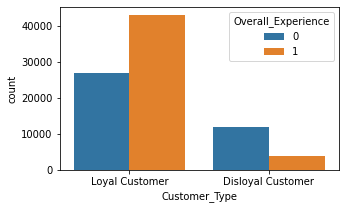

In [ ]:
t_col = ['Customer_Type']
for col in t_col:
  plt.figure(figsize=(5,3))
  sns.countplot(x = col, hue = 'Overall_Experience', data = merged_train_df)
  plt.show()

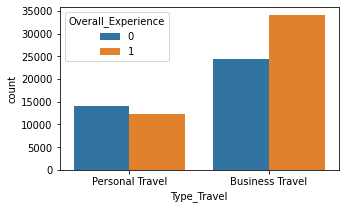

In [ ]:
t_col = ['Type_Travel']
for col in t_col:
  plt.figure(figsize=(5,3))
  sns.countplot(x = col, hue = 'Overall_Experience', data = merged_train_df)
  plt.show()

In [ ]:
merged_train_df['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [1, 0], inplace = True)
merged_test_df['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [1, 0], inplace = True)

merged_train_df['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [1, 0], inplace = True)
merged_test_df['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [1, 0], inplace = True)

merged_train_df['Gender'].replace(['Female', 'Male'], [1, 0], inplace = True)
merged_test_df['Gender'].replace(['Female', 'Male'], [1, 0], inplace = True)

In [ ]:
# Fill in Customer_Type, Type_Travel and Gender with mean

merged_train_df['Customer_Type'].fillna(merged_train_df['Customer_Type'].mean(), inplace=True)
merged_test_df['Customer_Type'].fillna(merged_test_df['Customer_Type'].mean(), inplace=True)

merged_train_df['Type_Travel'].fillna(merged_train_df['Type_Travel'].mean(), inplace=True)
merged_test_df['Type_Travel'].fillna(merged_test_df['Type_Travel'].mean(), inplace=True)

merged_train_df['Gender'].fillna(merged_train_df['Gender'].mean(), inplace=True)
merged_test_df['Gender'].fillna(merged_test_df['Gender'].mean(), inplace=True)


### **Fill in Age**

In [ ]:
merged_train_df['Age'].fillna(merged_train_df['Age'].mean(), inplace=True)
merged_test_df['Age'].fillna(merged_test_df['Age'].mean(), inplace=True)

In [ ]:
merged_train_df['Age'].unique()

array([52.        , 48.        , 43.        , 44.        , 50.        ,
       56.        , 65.        , 22.        , 57.        , 25.        ,
       26.        , 47.        , 33.        , 54.        ,  9.        ,
       68.        , 24.        , 23.        , 10.        , 55.        ,
       36.        , 62.        , 39.        , 29.        , 76.        ,
       30.        , 41.        ,  7.        , 32.        , 46.        ,
       35.        , 38.        , 61.        , 49.        , 21.        ,
       34.        , 27.        , 18.        , 37.        , 45.        ,
       63.        , 42.        , 13.        , 60.        , 64.        ,
       73.        , 20.        , 40.        , 58.        , 28.        ,
       19.        , 59.        , 31.        , 53.        , 17.        ,
       77.        , 69.        , 16.        , 70.        , 51.        ,
       66.        , 67.        , 14.        , 11.        , 12.        ,
        8.        , 71.        , 15.        , 80.        , 72.  

In [ ]:
merged_train_df['Age'] = pd.cut(merged_train_df['Age'], 5, labels = ['25', '35', '40', '60', '80'])
merged_test_df['Age'] = pd.cut(merged_test_df['Age'], 5, labels = ['25', '35', '40', '60', '80'])

In [ ]:
merged_train_df['Age'].replace('25','0',inplace = True)
merged_train_df['Age'].replace('35','0',inplace = True)
merged_train_df['Age'].replace('40','1',inplace = True)
merged_train_df['Age'].replace('60','1',inplace = True)
merged_train_df['Age'].replace('80','0',inplace = True)

merged_test_df['Age'].replace('25','0',inplace = True)
merged_test_df['Age'].replace('35','0',inplace = True)
merged_test_df['Age'].replace('40','1',inplace = True)
merged_test_df['Age'].replace('60','1',inplace = True)
merged_test_df['Age'].replace('80','0',inplace = True)

In [ ]:
# Final check for missing data
print("Null count- MergeTraining: ", merged_train_df.isna().sum(),"\n\n")
print("Null count- MergeTest: ", merged_test_df.isna().sum(),"\n")

Null count- MergeTraining:  ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64 


Null count- MergeTest:  ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onbo

## **6. Feature Engineering** 

In [ ]:
# survey_train_dummy_df = pd.get_dummies(survey_train_df, drop_first=True)
# survey_train_dummy_df.head()

In [ ]:
# #Selecting numerical columns and checking summary statistics
# num_cols = travel_train_df.select_dtypes('number').columns
# travel_train_df[num_cols].describe().T

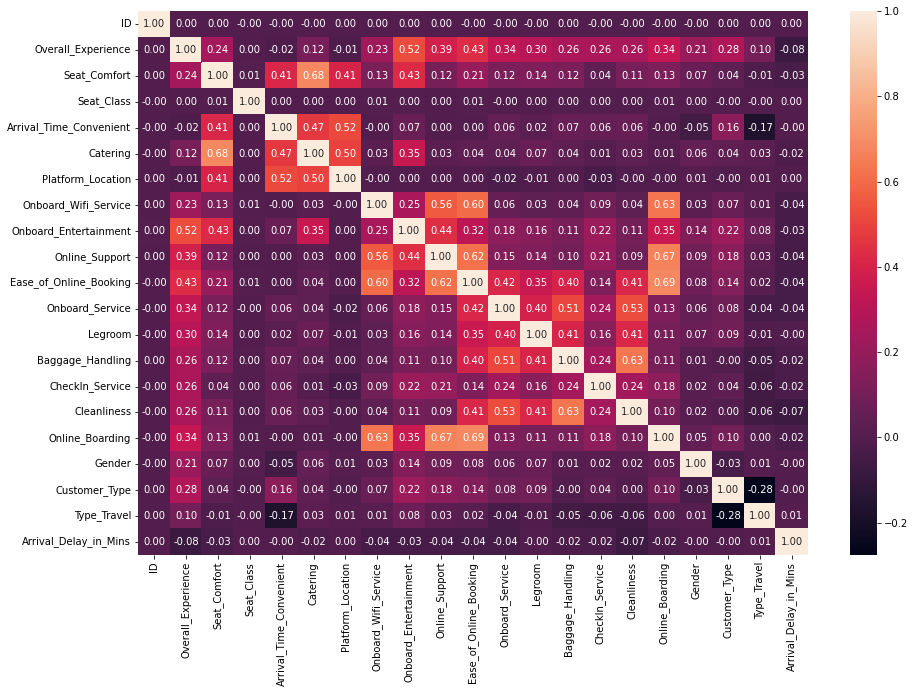

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(merged_train_df.corr(), annot=True, fmt='0.2f')
plt.show()

# **7. Split Train Data into Features and Target**

In [ ]:
from sklearn.model_selection import train_test_split

X = merged_train_df.drop(['ID', 
                          'Overall_Experience',
                          'Departure_Delay_in_Mins', 
                          'Arrival_Delay_in_Mins'], axis = 1)

Y = merged_train_df['Overall_Experience']

# **8. Data Encoding**


In [ ]:
X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# **9. Create Baseline Machine Learning Model**

## **A. Random Forest Model**

In [ ]:
# Import Random Forest Model

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 105)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9526912481457936


## **B. Random Forest Model + GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Try X validation
X1 = pd.get_dummies(merged_train_df, drop_first = True)
X = X1.drop(['ID', 'Overall_Experience'], axis = 1)
Y = X1['Overall_Experience']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2) 


# We've treid various search due to time constraint

# max_depth=[2,6, 8, 10, 16]
# n_estimators = [64, 128, 256, 500]
# param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
# # Build the grid search
# dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
# grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
# grid_results = grid.fit(X_train, y_train)

# # Summarize the results in a readable format
# print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
# results_df = pd.DataFrame(grid_results.cv_results_)
# results_df

# Best: [0.84335741 0.84342338 0.84596653 0.84825781 0.90132843 0.90238801
#  0.9022953  0.90217611 0.91217574 0.91279819 0.91294388 0.91274521
#  0.92367191 0.92363218 0.92424141 0.92413546 0.94507503 0.94571074
#  0.94613459 0.94598888], using {'max_depth': 16, 'n_estimators': 256}


clf = RandomForestClassifier(max_depth = 8,n_estimators=500, bootstrap=True, n_jobs = -1, random_state = 42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9114748887476161


## **Test**

In [ ]:
final_test = pd.get_dummies(merged_test_df, drop_first = True)
final_test = final_test.drop(['ID'], axis = 1)

final_pred = clf.predict(final_test)
print(final_pred)

[1 0 1 ... 0 1 0]


In [ ]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seat_Comfort               35602 non-null  float64
 1   Seat_Class                 35602 non-null  float64
 2   Arrival_Time_Convenient    35602 non-null  float64
 3   Catering                   35602 non-null  float64
 4   Platform_Location          35602 non-null  float64
 5   Onboard_Wifi_Service       35602 non-null  float64
 6   Onboard_Entertainment      35602 non-null  float64
 7   Online_Support             35602 non-null  float64
 8   Ease_of_Online_Booking     35602 non-null  float64
 9   Onboard_Service            35602 non-null  float64
 10  Legroom                    35602 non-null  float64
 11  Baggage_Handling           35602 non-null  float64
 12  CheckIn_Service            35602 non-null  float64
 13  Cleanliness                35602 non-null  flo

#### **Output final result**

In [ ]:
import csv
header = ['ID', 'Overall_Experience']
with open('Submission_RF.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(zip(merged_test_df.ID,final_pred))

## **C. Catboost Model**

In [ ]:
!pip3 install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

X1 = pd.get_dummies(merged_train_df, drop_first = True)
X = X1.drop(['ID', 'Overall_Experience'], axis = 1)
Y = X1['Overall_Experience']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9,stratify=Y,random_state=42)

model3 = CatBoostClassifier(iterations=400, depth=10,learning_rate = 0.06)

# fit the model with the training data
model3.fit(X_train , y_train,eval_set=(X_test,y_test))
print('\n Model Trained')

test_preds = model3.predict(X_test, prediction_type="Class")
train_preds = model3.predict(X_train, prediction_type="Class")

print("Training Accuracy:",accuracy_score(y_train, train_preds))
print("Test Accuracy:",accuracy_score(y_test, test_preds))

final_test = pd.get_dummies(merged_test_df, drop_first = True)
final_test = final_test.drop(['ID'], axis = 1)

final_pred = model3.predict(final_test)
print(final_pred)

0:	learn: 0.5916691	test: 0.5924071	best: 0.5924071 (0)	total: 32.5ms	remaining: 13s
1:	learn: 0.5117630	test: 0.5131543	best: 0.5131543 (1)	total: 61.8ms	remaining: 12.3s
2:	learn: 0.4558834	test: 0.4584846	best: 0.4584846 (2)	total: 90.6ms	remaining: 12s
3:	learn: 0.4065911	test: 0.4097546	best: 0.4097546 (3)	total: 120ms	remaining: 11.9s
4:	learn: 0.3769027	test: 0.3811759	best: 0.3811759 (4)	total: 151ms	remaining: 12s
5:	learn: 0.3436910	test: 0.3490698	best: 0.3490698 (5)	total: 185ms	remaining: 12.1s
6:	learn: 0.3239581	test: 0.3301025	best: 0.3301025 (6)	total: 216ms	remaining: 12.1s
7:	learn: 0.3018254	test: 0.3086771	best: 0.3086771 (7)	total: 247ms	remaining: 12.1s
8:	learn: 0.2863738	test: 0.2935216	best: 0.2935216 (8)	total: 277ms	remaining: 12s
9:	learn: 0.2701623	test: 0.2779261	best: 0.2779261 (9)	total: 307ms	remaining: 12s
10:	learn: 0.2592548	test: 0.2673172	best: 0.2673172 (10)	total: 356ms	remaining: 12.6s
11:	learn: 0.2472772	test: 0.2559018	best: 0.2559018 (11)	t

#### **Output final result**

In [ ]:
import csv
header = ['ID', 'Overall_Experience']
with open('Submission_CB.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(zip(merged_test_df.ID,final_pred))

## **D. Gradient Boosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth =7, n_estimators=500)
gbc.fit(X_train, y_train)

test_preds = gbc.predict(X_test)
train_preds = gbc.predict(X_train)

print("Training Accuracy:",accuracy_score(y_train, train_preds))
print("Test Accuracy:",accuracy_score(y_test, test_preds))

final_test = pd.get_dummies(merged_test_df, drop_first = True)
final_test = final_test.drop(['ID'], axis = 1)

final_pred = clf.predict(final_test)
print(final_pred)

Training Accuracy: 0.9924889040628201
Test Accuracy: 0.953168044077135
[1 0 1 ... 0 1 0]


#### **Output final result**

In [ ]:
import csv
header = ['ID', 'Overall_Experience']
with open('Submission_GB.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(zip(merged_test_df.ID,final_pred))

## **E. Decision Tree Model**

In [ ]:
# DT at 7:45 PM
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier(random_state =9, max_depth=15, min_samples_split= 75, min_samples_leaf = 15)
dtr.fit(X_train, y_train)

train_preds = dtr.predict(X_train)
test_preds = dtr.predict(X_test)


print("Training Accuracy:",accuracy_score(y_train, train_preds))
print("Test Accuracy:",accuracy_score(y_test, test_preds))

final_test = pd.get_dummies(merged_test_df, drop_first = True)
final_test = final_test.drop(['ID'], axis = 1)

final_pred = dtr.predict(final_test)
print(final_pred)

Training Accuracy: 0.9443731531298195
Test Accuracy: 0.9339902521720703
[1 1 1 ... 0 1 0]


#### **Output final result**

In [ ]:
import csv
header = ['ID', 'Overall_Experience']
with open('Submission_DT.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(zip(merged_test_df.ID,final_pred))

# **10. Ensemble Model** 

## **A. Catboost + Gradient**

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble=VotingClassifier(estimators=[('CatBoosting', model3),('Gradient Boost ', gbc)], voting='soft', weights=[5,1]).fit(X_train,y_train)

print('Combined accuracy :',ensemble.score(X_test,y_test))

#X_train, X_test, y_train, y_test
final_test = pd.get_dummies(merged_test_df, drop_first = True)
final_test = final_test.drop(['ID'], axis = 1)

final_pred = ensemble.predict(final_test)
print(final_pred)

0:	learn: 0.5916691	total: 31.3ms	remaining: 12.5s
1:	learn: 0.5117630	total: 59.7ms	remaining: 11.9s
2:	learn: 0.4558834	total: 89.8ms	remaining: 11.9s
3:	learn: 0.4065911	total: 119ms	remaining: 11.8s
4:	learn: 0.3769027	total: 148ms	remaining: 11.7s
5:	learn: 0.3436910	total: 178ms	remaining: 11.7s
6:	learn: 0.3239581	total: 208ms	remaining: 11.7s
7:	learn: 0.3018254	total: 239ms	remaining: 11.7s
8:	learn: 0.2863738	total: 270ms	remaining: 11.7s
9:	learn: 0.2701623	total: 299ms	remaining: 11.7s
10:	learn: 0.2592548	total: 328ms	remaining: 11.6s
11:	learn: 0.2472772	total: 360ms	remaining: 11.6s
12:	learn: 0.2367158	total: 389ms	remaining: 11.6s
13:	learn: 0.2291451	total: 418ms	remaining: 11.5s
14:	learn: 0.2187912	total: 453ms	remaining: 11.6s
15:	learn: 0.2117628	total: 485ms	remaining: 11.6s
16:	learn: 0.2063463	total: 517ms	remaining: 11.6s
17:	learn: 0.1998586	total: 548ms	remaining: 11.6s
18:	learn: 0.1959780	total: 579ms	remaining: 11.6s
19:	learn: 0.1905069	total: 610ms	rema

#### **Output final result**

In [ ]:
import csv
header = ['ID', 'Overall_Experience']
with open('Submission_E1.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(zip(merged_test_df.ID,final_pred))

## **B. Decision Tree + Catboost + Gradient**

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble=VotingClassifier(estimators=[('Decision Tree', dtr), ('CatBoosting', model3),('Gradient Boost ', gbc)], 
                          voting='hard', 
                          n_jobs=-1,
                          weights=[3,6,1]).fit(X_train,y_train)

print('Combined accuracy :',ensemble.score(X_test,y_test))
print('Combined accuracy :',ensemble.score(X_test,y_test))

#X_train, X_test, y_train, y_test
final_test = pd.get_dummies(merged_test_df, drop_first = True)
final_test = final_test.drop(['ID'], axis = 1)

final_pred = ensemble.predict(final_test)
print(final_pred)

Combined accuracy : 0.9525323161686798
Combined accuracy : 0.9525323161686798
[1 1 1 ... 1 1 0]


In [ ]:
import csv
header = ['ID', 'Overall_Experience']
with open('Submission_E2.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(zip(merged_test_df.ID,final_pred))

## **F. Artifical Nueral Network Model**

In [ ]:
np.random.seed(42)
import random
import tensorflow as tf
random.seed(42)
tf.random.set_seed(42)

import keras
from keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Dense, Dropout, Activation
# from keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
X = merged_train_df.drop(['ID', 
                          'Overall_Experience', 
                          'Departure_Delay_in_Mins', 
                          'Arrival_Delay_in_Mins'], axis = 1)

Y = merged_train_df['Overall_Experience']

In [ ]:
X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
model_1 = Sequential()
model_1.add(Dense(1024, activation='relu', input_dim = 24))
model_1.add(Dropout(0.20))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.20))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.20))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate= 1e-3)
model_1.compile(loss = 'binary_crossentropy', 
                optimizer='adamax', 
                metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', 
                           patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', 
                             monitor ='val_loss', 
                             save_best_only = True)]

In [ ]:
history_1 = model_1.fit(X_train, 
                    y_train,
                    # callbacks = callbacks,
                    validation_split = 0.2, 
                    epochs = 30, 
                    verbose = 1)

Epoch 1/30
1888/1888 [==============================] - 7s 3ms/step - loss: 0.3150 - accuracy: 0.8607 - val_loss: 0.2168 - val_accuracy: 0.9095
Epoch 2/30
1888/1888 [==============================] - 6s 3ms/step - loss: 0.2148 - accuracy: 0.9081 - val_loss: 0.1881 - val_accuracy: 0.9191
Epoch 3/30
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1876 - accuracy: 0.9199 - val_loss: 0.1583 - val_accuracy: 0.9342
Epoch 4/30
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1693 - accuracy: 0.9272 - val_loss: 0.1535 - val_accuracy: 0.9340
Epoch 5/30
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1590 - accuracy: 0.9320 - val_loss: 0.1475 - val_accuracy: 0.9359
Epoch 6/30
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1504 - accuracy: 0.9352 - val_loss: 0.1372 - val_accuracy: 0.9403
Epoch 7/30
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1459 - accuracy: 0.9369 - val_loss: 0.1358 - val_accuracy:

In [ ]:
model_1.evaluate(X_test, y_test, verbose = 1)
test_pred = np.round(model_1.predict(X_test))

590/590 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9508


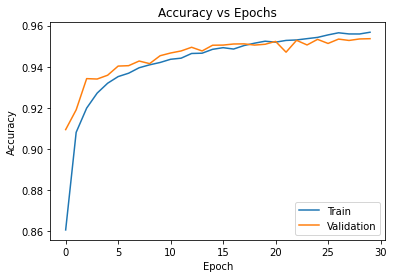

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8405
           1       0.96      0.95      0.96     10471

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



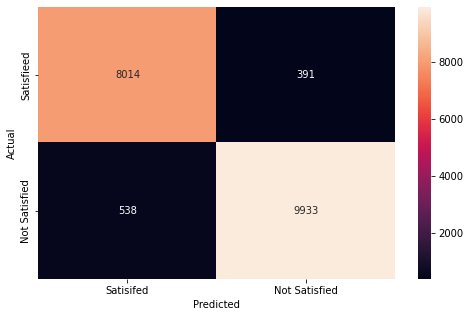

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Satisifed', 'Not Satisfied'], yticklabels=['Satisfieed', 'Not Satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
test_df = merged_test_df.drop(['ID', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], axis = 1)
final_test = pd.get_dummies(test_df, drop_first = True)
final_pred = np.round(model_1.predict(final_test))
print(final_pred)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


In [ ]:
import csv
header = ['ID', 'Overall_Experience']
with open('Submission_NN.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(zip(merged_test_df.ID,final_pred))